In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

# missing data basics

In [2]:
df = pd.DataFrame(np.random.randn(5,3),
                 index = ['a','c','e','f','h'],
                 columns=['one','two','three'])
df

,one,two,three
a,-0.621595,0.946616,-2.240083
c,0.924726,-0.872376,0.447020
e,-0.310094,-1.241910,-0.989351
f,-0.008113,1.050393,-1.226528
h,1.004025,0.111833,0.076570


In [3]:
df['four'] = 'bar'
df['five'] = df['one']>0

In [4]:
df

,one,two,three,four,five
a,-0.621595,0.946616,-2.240083,bar,False
c,0.924726,-0.872376,0.447020,bar,True
e,-0.310094,-1.241910,-0.989351,bar,False
f,-0.008113,1.050393,-1.226528,bar,False
h,1.004025,0.111833,0.076570,bar,True


In [5]:
df2 = df.reindex(['a','b','c','d','e','f','g','h'])
df2
#reindex用来重置索引 多出来的索引对应的值为NaN

,one,two,three,four,five
a,-0.621595,0.946616,-2.240083,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,0.924726,-0.872376,0.447020,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-0.310094,-1.241910,-0.989351,bar,False
f,-0.008113,1.050393,-1.226528,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,1.004025,0.111833,0.076570,bar,True


In [6]:
df2['one']

a   -0.621595
b         NaN
c    0.924726
d         NaN
e   -0.310094
f   -0.008113
g         NaN
h    1.004025
Name: one, dtype: float64

In [7]:
pd.isnull(df2['one']) #isnull用来判断是不是nan 返回Boolean array

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [8]:
pd.notnull(df2['one']) #和上面相反

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

In [10]:
df2.one.notnull() #和上面作用一样

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

In [12]:
df2.isnull()

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


In [13]:
None == None

True

In [14]:
np.nan == np.nan #上下两个结果不一样

False

In [15]:
None == np.nan

False

In [17]:
df2['one'] == np.nan #pandas 和 numpy的底层逻辑一样 两个nan比较都是false

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
Name: one, dtype: bool

# datatimes

In [18]:
df2 = df.copy()
df2

,one,two,three,four,five
a,-0.621595,0.946616,-2.240083,bar,False
c,0.924726,-0.872376,0.447020,bar,True
e,-0.310094,-1.241910,-0.989351,bar,False
f,-0.008113,1.050393,-1.226528,bar,False
h,1.004025,0.111833,0.076570,bar,True


In [19]:
df2['timestamp'] = pd.Timestamp('20120101')
df2

,one,two,three,four,five,timestamp
a,-0.621595,0.946616,-2.240083,bar,False,2012-01-01
c,0.924726,-0.872376,0.447020,bar,True,2012-01-01
e,-0.310094,-1.241910,-0.989351,bar,False,2012-01-01
f,-0.008113,1.050393,-1.226528,bar,False,2012-01-01
h,1.004025,0.111833,0.076570,bar,True,2012-01-01


In [20]:
df2.loc[['a','c','h'] , ['one','timestamp']] = np.nan
df2 #自动把nan转为nat 不是时间的标记值
#pandas 提供nan和nat之间的连接

,one,two,three,four,five,timestamp
a,NaN,0.946616,-2.240083,bar,False,NaT
c,NaN,-0.872376,0.447020,bar,True,NaT
e,-0.310094,-1.241910,-0.989351,bar,False,2012-01-01
f,-0.008113,1.050393,-1.226528,bar,False,2012-01-01
h,NaN,0.111833,0.076570,bar,True,NaT


In [21]:
df2.get_dtype_counts()

bool              1
datetime64[ns]    1
float64           3
object            1
dtype: int64

In [22]:
df2.get_ftype_counts()

bool:dense              1
datetime64[ns]:dense    1
float64:dense           3
object:dense            1
dtype: int64

# insert missing data

In [24]:
#可以使用None 作为缺失值的一个容器 具体的缺失值由dtype自动适配
s = pd.Series([1,2,3])
s.loc[0] = None
s #s[0]自动为nan

0    NaN
1    2.0
2    3.0
dtype: float64

In [28]:
#数值缺失值 用nan
#时间缺失值 用nat
#对象缺失值 使用给定的类型 none nan 赋哪个就是哪个
s = pd.Series(['a','b','c'])
s.loc[0]=None
s.loc[1] = np.nan
s

0    None
1     NaN
2       c
dtype: object

# calculations with missing data

In [30]:
a=pd.DataFrame(np.random.randn(5,2) , index=['a','c','e','f','h'],
              columns=['one','two'])
a.loc['a','one'] = np.nan
a.loc['c','one'] = np.nan
a

,one,two
a,NaN,0.269696
c,NaN,0.483095
e,0.372981,-1.229066
f,-0.250611,1.859499
h,-0.765466,-0.892778


In [31]:
b=pd.DataFrame(np.random.randn(5,3) , index=['a','c','e','f','h'],
              columns=['one','two','three'])
b.loc['a','one'] = np.nan
b.loc['c','one'] = np.nan
b.loc['h','one'] = np.nan
b

,one,two,three
a,NaN,0.157188,-0.486961
c,NaN,0.074352,-0.041772
e,-1.230958,0.493409,-0.616670
f,0.720570,0.826200,1.472420
h,NaN,0.690375,-0.669900


In [32]:
a+b

,one,three,two
a,NaN,NaN,0.426884
c,NaN,NaN,0.557447
e,-0.857977,NaN,-0.735658
f,0.469960,NaN,2.685699
h,NaN,NaN,-0.202403


In [33]:
df = b.copy()

In [34]:
df

,one,two,three
a,NaN,0.157188,-0.486961
c,NaN,0.074352,-0.041772
e,-1.230958,0.493409,-0.616670
f,0.720570,0.826200,1.472420
h,NaN,0.690375,-0.669900


In [35]:
df['one'].sum()

-0.5103877335701187

In [37]:
df.mean(axis=1)

a   -0.164887
c    0.016290
e   -0.451407
f    1.006397
h    0.010238
dtype: float64

In [38]:
df.cumsum() #累加计算

,one,two,three
a,NaN,0.157188,-0.486961
c,NaN,0.231540,-0.528733
e,-1.230958,0.724949,-1.145403
f,-0.510388,1.551149,0.327016
h,NaN,2.241524,-0.342884


In [42]:
s = pd.Series([np.nan])
print(s)
s.sum()

0   NaN
dtype: float64


0.0

In [40]:
pd.Series([]).sum()

0

In [43]:
np.nansum(np.array([np.nan]))

0.0

In [45]:
np.nansum(np.array([]))

0.0

In [48]:
np.sum(np.array([np.nan]))

nan

In [50]:
df

,one,two,three
a,NaN,0.157188,-0.486961
c,NaN,0.074352,-0.041772
e,-1.230958,0.493409,-0.616670
f,0.720570,0.826200,1.472420
h,NaN,0.690375,-0.669900


In [52]:
temp = df.groupby('one')

In [53]:
temp.mean() #groupby会自动过滤nan

,two,three
one,,
-1.230958,0.493409,-0.61667
0.720570,0.826200,1.47242


# cleaning /filling missing data

In [54]:
df2

,one,two,three,four,five,timestamp
a,NaN,0.946616,-2.240083,bar,False,NaT
c,NaN,-0.872376,0.447020,bar,True,NaT
e,-0.310094,-1.241910,-0.989351,bar,False,2012-01-01
f,-0.008113,1.050393,-1.226528,bar,False,2012-01-01
h,NaN,0.111833,0.076570,bar,True,NaT


In [55]:
df2.fillna(0)

,one,two,three,four,five,timestamp
a,0.000000,0.946616,-2.240083,bar,False,1970-01-01
c,0.000000,-0.872376,0.447020,bar,True,1970-01-01
e,-0.310094,-1.241910,-0.989351,bar,False,2012-01-01
f,-0.008113,1.050393,-1.226528,bar,False,2012-01-01
h,0.000000,0.111833,0.076570,bar,True,1970-01-01


In [57]:
df2['four'].fillna('missing') #因为没有nan 所以什么可填充

a    bar
c    bar
e    bar
f    bar
h    bar
Name: four, dtype: object

In [58]:
df

,one,two,three
a,NaN,0.157188,-0.486961
c,NaN,0.074352,-0.041772
e,-1.230958,0.493409,-0.616670
f,0.720570,0.826200,1.472420
h,NaN,0.690375,-0.669900


In [59]:
df.fillna(method='pad') #利用nan上面的非nan值进行填充

,one,two,three
a,NaN,0.157188,-0.486961
c,NaN,0.074352,-0.041772
e,-1.230958,0.493409,-0.616670
f,0.720570,0.826200,1.472420
h,0.720570,0.690375,-0.669900


In [62]:
df.loc['e'] = df.loc['f'] = np.nan
df

,one,two,three
a,NaN,0.157188,-0.486961
c,NaN,0.074352,-0.041772
e,NaN,NaN,NaN
f,NaN,NaN,NaN
h,NaN,0.690375,-0.669900


In [64]:
df.fillna(method='pad' , limit=2) #limit=2 就是填充2个

,one,two,three
a,NaN,0.157188,-0.486961
c,NaN,0.074352,-0.041772
e,NaN,0.074352,-0.041772
f,NaN,0.074352,-0.041772
h,NaN,0.690375,-0.669900


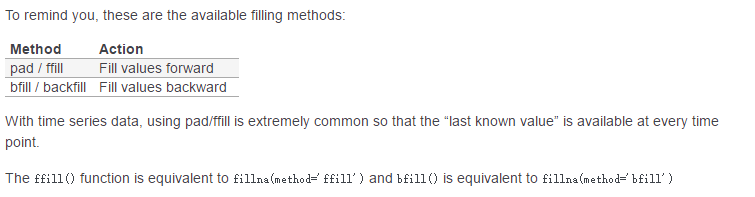

In [67]:
dff  = pd.DataFrame(np.random.randn(10 , 3) , columns=['A','B','C'])
dff

,A,B,C
0,-0.643064,-0.863520,0.892184
1,0.064871,0.954996,0.841251
2,-0.708255,0.510371,-0.584392
3,0.321039,-1.255056,-0.253112
4,0.888671,0.764540,0.807232
5,0.819039,-0.014656,0.652313
6,-1.152983,1.129290,0.280172
7,1.507955,0.061256,-0.297752
8,0.143807,0.593388,0.141900
9,-0.596637,0.175561,-0.534954


In [68]:
dff.iloc[3:5 , 0] = np.nan
dff.iloc[4:6 , 1] = np.nan
dff.iloc[5:8 , 2] = np.nan

dff

,A,B,C
0,-0.643064,-0.863520,0.892184
1,0.064871,0.954996,0.841251
2,-0.708255,0.510371,-0.584392
3,NaN,-1.255056,-0.253112
4,NaN,NaN,0.807232
5,0.819039,NaN,NaN
6,-1.152983,1.129290,NaN
7,1.507955,0.061256,NaN
8,0.143807,0.593388,0.141900
9,-0.596637,0.175561,-0.534954


In [70]:
dff.fillna(dff.mean())

,A,B,C
0,-0.643064,-0.863520,0.892184
1,0.064871,0.954996,0.841251
2,-0.708255,0.510371,-0.584392
3,-0.070658,-1.255056,-0.253112
4,-0.070658,0.163286,0.807232
5,0.819039,0.163286,0.187159
6,-1.152983,1.129290,0.187159
7,1.507955,0.061256,0.187159
8,0.143807,0.593388,0.141900
9,-0.596637,0.175561,-0.534954


In [69]:
dff.mean()

A   -0.070658
B    0.163286
C    0.187159
dtype: float64

In [71]:
dff.fillna({'A':52. , 'B':53. ,'C':54.})

,A,B,C
0,-0.643064,-0.863520,0.892184
1,0.064871,0.954996,0.841251
2,-0.708255,0.510371,-0.584392
3,52.000000,-1.255056,-0.253112
4,52.000000,53.000000,0.807232
5,0.819039,53.000000,54.000000
6,-1.152983,1.129290,54.000000
7,1.507955,0.061256,54.000000
8,0.143807,0.593388,0.141900
9,-0.596637,0.175561,-0.534954


In [77]:
dff.fillna(dff.mean()['B':'C']) #部分填充

,A,B,C
0,-0.643064,-0.863520,0.892184
1,0.064871,0.954996,0.841251
2,-0.708255,0.510371,-0.584392
3,NaN,-1.255056,-0.253112
4,NaN,0.163286,0.807232
5,0.819039,0.163286,0.187159
6,-1.152983,1.129290,0.187159
7,1.507955,0.061256,0.187159
8,0.143807,0.593388,0.141900
9,-0.596637,0.175561,-0.534954


In [78]:
dff

,A,B,C
0,-0.643064,-0.863520,0.892184
1,0.064871,0.954996,0.841251
2,-0.708255,0.510371,-0.584392
3,NaN,-1.255056,-0.253112
4,NaN,NaN,0.807232
5,0.819039,NaN,NaN
6,-1.152983,1.129290,NaN
7,1.507955,0.061256,NaN
8,0.143807,0.593388,0.141900
9,-0.596637,0.175561,-0.534954


In [79]:
dff.where(pd.notnull(dff) , dff.mean() , axis='columns') #类似数据库中的where条件过滤
#第一个参数是过滤掉的元素 第二个参数是其余的元素被赋的值

,A,B,C
0,-0.643064,-0.863520,0.892184
1,0.064871,0.954996,0.841251
2,-0.708255,0.510371,-0.584392
3,-0.070658,-1.255056,-0.253112
4,-0.070658,0.163286,0.807232
5,0.819039,0.163286,0.187159
6,-1.152983,1.129290,0.187159
7,1.507955,0.061256,0.187159
8,0.143807,0.593388,0.141900
9,-0.596637,0.175561,-0.534954


In [82]:
df.loc[: , ['two' , 'three']] = np.random.randn(5,2)
df.loc[: , 'one'] = np.nan
df

,one,two,three
a,NaN,-0.013911,-0.084357
c,NaN,0.351070,0.757867
e,NaN,1.063673,-0.369392
f,NaN,-2.177339,0.914896
h,NaN,-1.315493,0.353704


In [83]:
df.dropna(axis=0)

,one,two,three


In [84]:
df.dropna(axis=1)

,two,three
a,-0.013911,-0.084357
c,0.351070,0.757867
e,1.063673,-0.369392
f,-2.177339,0.914896
h,-1.315493,0.353704


In [85]:
df['one'].dropna() #nan全部删除了

Series([], Name: one, dtype: float64)

In [86]:
ser = pd.Series([0.0 , np.nan ,10.] , index=[0. , 1. , 10.])
ser

0.0      0.0
1.0      NaN
10.0    10.0
dtype: float64

In [87]:
ser.interpolate() #插值
#参数是method=''
#默认是线性插值
#默认情况 是线性的插值 对缺失值进行线性插值

0.0      0.0
1.0      5.0
10.0    10.0
dtype: float64

In [88]:
#对dataframe也能进行线性插值
df = pd.DataFrame({'A':[1,2.1,np.nan,4.7,5.6,6.8],
                   'B':[.25 , np.nan , np.nan , 4 , 12.2 , 14.4]})
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [89]:
df.interpolate() #dataframe线性插值

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [ ]:
ser.interpolate(limit , limit_direction=)
#limit为插值的数量（在每个column的插值数目）
#limit_direction 为插值方向
#forward是向下

# replacing generic values

In [90]:
ser = pd.Series([0. , 1. , 2. , 3. , 4.])
ser.replace(0 , 5) #参数： position value


0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [91]:
ser.replace([0,1,2,3,4],[4,3,2,1,0]) #指定一堆的index进行替换


0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64

In [92]:
ser.replace({0:10 , 1:'fei'}) #还可以这样替换

0     10
1    fei
2      2
3      3
4      4
dtype: object

In [97]:
#dataframe的replace函数
df = pd.DataFrame({'a':[0,1,2,3,4],
                   'b':[5,6,7,8,9]})

df.replace({'a':0 , 'b':5} , 100) #需要指定column和value 然后指定欲替换的value

,a,b
0,100,100
1,1,6
2,2,7
3,3,8
4,4,9


In [98]:
ser

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [99]:
ser.replace([1,2,3] , method='pad') #将给定的数据看做缺失值 进行插值处理

0    0.0
1    0.0
2    0.0
3    0.0
4    4.0
dtype: float64

# string regular expression replacement

In [100]:
d = {'a':list(range(4)) ,
    'b':list('ab..'),
    'c':['a','b',np.nan,'d']}
df = pd.DataFrame(d)
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [101]:
df.replace('.',np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [102]:
df.replace(r'\s*\.\s*' , np.nan , regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


# numeric replacement

In [107]:
df = pd.DataFrame(np.random.randn(10 , 2))
df

,0,1
0,-0.789299,0.353599
1,-1.176426,0.221267
2,0.181036,-1.484734
3,-2.612003,0.062546
4,0.627846,0.034739
5,1.322550,0.178553
6,-0.467800,-0.092087
7,-0.486237,0.072166
8,0.866280,0.104560
9,1.501032,0.985454


In [111]:
df[np.random.rand(df.shape[0])>0.5]

,0,1
0,-0.789299,0.353599
2,0.181036,-1.484734
3,-2.612003,0.062546
5,1.322550,0.178553
6,-0.467800,-0.092087
9,1.501032,0.985454


In [112]:
df[np.random.rand(df.shape[0])>0.5] = 1.5

In [113]:
df

,0,1
0,-0.789299,0.353599
1,-1.176426,0.221267
2,1.500000,1.500000
3,1.500000,1.500000
4,0.627846,0.034739
5,1.500000,1.500000
6,1.500000,1.500000
7,1.500000,1.500000
8,0.866280,0.104560
9,1.501032,0.985454


In [114]:
df.replace(1.5 , np.nan)

,0,1
0,-0.789299,0.353599
1,-1.176426,0.221267
2,NaN,NaN
3,NaN,NaN
4,0.627846,0.034739
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,0.866280,0.104560
9,1.501032,0.985454


In [117]:
df00 = df.values[0,0]

In [118]:
df.replace([1.5 , df00] , [np.nan , 'fei'])
#1.5替换nan
#df00替换为'fei

,0,1
0,fei,0.353599
1,-1.17643,0.221267
2,NaN,NaN
3,NaN,NaN
4,0.627846,0.0347394
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,0.86628,0.10456
9,1.50103,0.985454


In [119]:
'''When replacing multiple bool or datetime64 objects, the first argument to replace (to_replace) must match the type of the value being replaced type. For example,'''

'When replacing multiple bool or datetime64 objects, the first argument to replace (to_replace) must match the type of the value being replaced type. For example,'

In [120]:
s = pd.Series([True , False , True])
s.replace({'a string':'new value' , True:False})
#报错

TypeError: Cannot compare types 'ndarray(dtype=bool)' and 'str'

In [123]:
s = pd.Series([True , False , True])
s.replace('a string','new value')
#可以运行

0     True
1    False
2     True
dtype: bool

# missing data casting rules and indexing

In [125]:
s = pd.Series(np.random.randn(5) , index = [0,2,4,6,7])
s>0

0     True
2    False
4    False
6    False
7    False
dtype: bool

In [129]:
(s>0).dtype #dtype成员可以查看类型

dtype('bool')

In [132]:
crit = (s>0).reindex(list(range(8)))
crit

0     True
1      NaN
2    False
3      NaN
4    False
5      NaN
6    False
7    False
dtype: object

In [135]:
crit.dtype

dtype('O')

In [141]:
reindexed = s.reindex(list(range(8))).fillna(0)
reindexed

0    1.801281
1    0.000000
2   -0.485624
3    0.000000
4   -1.146809
5    0.000000
6   -0.171654
7   -1.100942
dtype: float64

In [142]:
reindexed[crit]
#crit包含nan 出现异常

ValueError: cannot index with vector containing NA / NaN values

In [143]:
reindexed[crit.fillna(True)]
#reindexed[crit.fillna(False)]

0    1.801281
1    0.000000
3    0.000000
5    0.000000
dtype: float64